In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from PIL import Image





EDA

<AxesSubplot: >

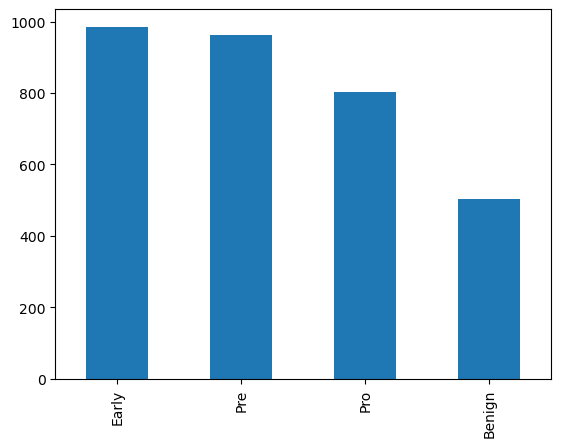

In [27]:
pictures=[]
for Dir in os.listdir('Original'):
    for dir1 in os.listdir('Original'+'\\'+str(Dir)):
        pictures.append(('Original'+'\\'+str(Dir)+'\\'+dir1,Dir,dir1))
        
#get an histogram with the amount of images per category
df=pd.DataFrame(pictures,columns=['Dir','Category','Image'])
df['Category'].value_counts().plot(kind='bar')

In [28]:
df

,Dir,Category,Image
0,Original\Benign\WBC-Benign-001.jpg,Benign,WBC-Benign-001.jpg
1,Original\Benign\WBC-Benign-002.jpg,Benign,WBC-Benign-002.jpg
2,Original\Benign\WBC-Benign-003.jpg,Benign,WBC-Benign-003.jpg
3,Original\Benign\WBC-Benign-004.jpg,Benign,WBC-Benign-004.jpg
4,Original\Benign\WBC-Benign-005.jpg,Benign,WBC-Benign-005.jpg
...,...,...,...
3251,Original\Pro\WBC-Malignant-Pro-800.jpg,Pro,WBC-Malignant-Pro-800.jpg
3252,Original\Pro\WBC-Malignant-Pro-801.jpg,Pro,WBC-Malignant-Pro-801.jpg
3253,Original\Pro\WBC-Malignant-Pro-802.jpg,Pro,WBC-Malignant-Pro-802.jpg
3254,Original\Pro\WBC-Malignant-Pro-803.jpg,Pro,WBC-Malignant-Pro-803.jpg


In [29]:
##open jpg file from directory
size=[]
color=[]
color1=[]

for image in df.Dir:
    I = np.asarray(Image.open(image))
    im = Image.fromarray(np.uint8(I))

    #get the color of the image
    color.append(im.mode)
    

    ##show image
    size.append(np.shape(I))
    #im.show(im)
df['size']=size 
df['Mode']=color

df

,Dir,Category,Image,size,Mode
0,Original\Benign\WBC-Benign-001.jpg,Benign,WBC-Benign-001.jpg,"(224, 224, 3)",RGB
1,Original\Benign\WBC-Benign-002.jpg,Benign,WBC-Benign-002.jpg,"(224, 224, 3)",RGB
2,Original\Benign\WBC-Benign-003.jpg,Benign,WBC-Benign-003.jpg,"(224, 224, 3)",RGB
3,Original\Benign\WBC-Benign-004.jpg,Benign,WBC-Benign-004.jpg,"(224, 224, 3)",RGB
4,Original\Benign\WBC-Benign-005.jpg,Benign,WBC-Benign-005.jpg,"(224, 224, 3)",RGB
...,...,...,...,...,...
3251,Original\Pro\WBC-Malignant-Pro-800.jpg,Pro,WBC-Malignant-Pro-800.jpg,"(224, 224, 3)",RGB
3252,Original\Pro\WBC-Malignant-Pro-801.jpg,Pro,WBC-Malignant-Pro-801.jpg,"(224, 224, 3)",RGB
3253,Original\Pro\WBC-Malignant-Pro-802.jpg,Pro,WBC-Malignant-Pro-802.jpg,"(224, 224, 3)",RGB
3254,Original\Pro\WBC-Malignant-Pro-803.jpg,Pro,WBC-Malignant-Pro-803.jpg,"(224, 224, 3)",RGB


<AxesSubplot: >

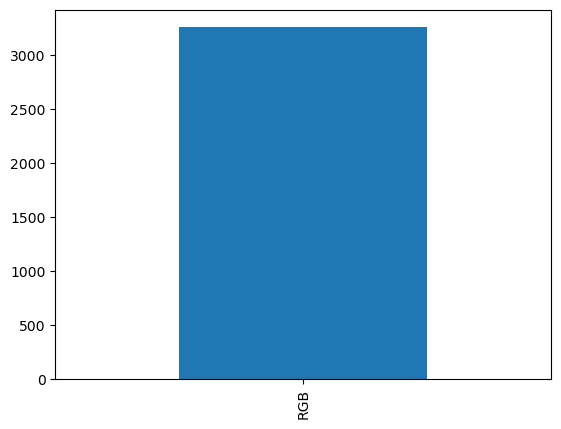

In [30]:
df['Mode'].value_counts().plot(kind='bar')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Dir       3256 non-null   object
 1   Category  3256 non-null   object
 2   Image     3256 non-null   object
 3   size      3256 non-null   object
 4   Mode      3256 non-null   object
dtypes: object(5)
memory usage: 127.3+ KB


In [33]:
df.describe()

,Dir,Category,Image,size,Mode
count,3256,3256,3256,3256,3256
unique,3256,4,3256,1,1
top,Original\Benign\WBC-Benign-001.jpg,Early,WBC-Benign-001.jpg,"(224, 224, 3)",RGB
freq,1,985,1,3256,3256


In [35]:
## function to do Adaptive histogram equalization
def adaptive_hist_eq(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(image)
    return cl1

## function to do histogram normalization
def hist_norm(image):
    norm_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return norm_image

In [44]:
##function that gets all the pictures from the directory and apply the adaptive histogram equalization
def get_images(directory):
    images=[]
    for dir in os.listdir(directory):
        for dir1 in os.listdir('Original'+'\\'+str(dir)):
            img = cv2.imread(directory+'\\'+dir+'\\'+dir1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = adaptive_hist_eq(img)
            img = hist_norm(img)
            images.append(img)
    return images

In [45]:
images=get_images('Original')

In [46]:
np.shape(images)

(3256, 224, 224)

In [47]:
##function to show a batch of images
def show_images(images):
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.imshow(images[i], cmap='gray')
    plt.show()

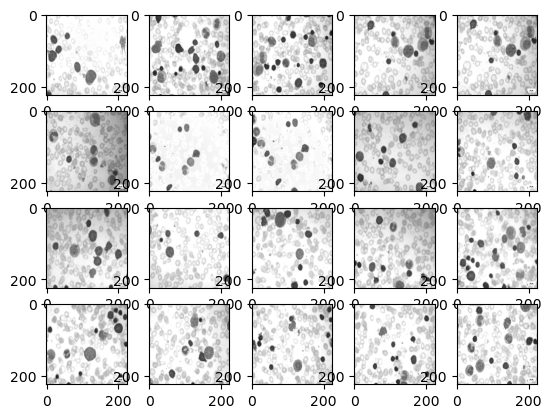

In [48]:
show_images(images)